# Assignment 2: Convolution and Canny edge detection

## Exercise 2.1
Implement the convolution operation for 2-D images (i.e. no colors here, sorry). 

[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]] 159


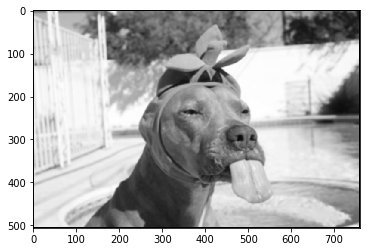

In [3]:
#%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, color


def conv2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    assert kernel_width % 2 != 0 and kernel_height % 2 != 0, 'kernel dimensions must but odd'
    kernel_sum = np.sum(kernel)
    print(kernel, kernel_sum)

    image_height, image_width = image.shape
#     convoluted_image = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
    convoluted_image = np.zeros(image.shape)
    
    padding_x = kernel_width // 2
    padding_y = kernel_height // 2
    
    for row in range(padding_y, image_height - padding_y):
        for col in range(padding_x, image_width - padding_x):
            area = image[row-padding_y:row+padding_y+1, col-padding_x:col+padding_x+1]
#             print(area)
#             convoluted_image[row, col] = (area * kernel) / kernel_sum
            convoluted_image[row, col] = (area * kernel).sum()
    
    return convoluted_image


image = color.rgb2gray(io.imread('images/dog.jpg'))
# print(image.shape)
# print(image)

kernel = np.array([
    [2, 4, 5, 4, 2],
    [4, 9, 12, 9, 4],
    [5, 12, 15, 12, 5],
    [4, 9, 12, 9, 4],
    [2, 4, 5, 4, 2],
])

plt.imshow(conv2d(image, kernel), cmap='gray')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

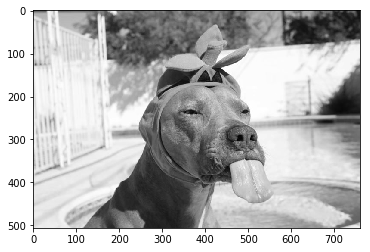

In [4]:
plt.imshow(image, cmap='gray')
plt.show

Convolve an image of your choice with a Gaussian kernel. Play around with the size of the kernel and the standard deviation of the Gaussian. Show your results (***RESULT***). 

Now, implement a simple edge detector by first filtering with a Sobel operator and then thresholding the ***RESULT***. How does smoothing the input change the ***RESULT***?

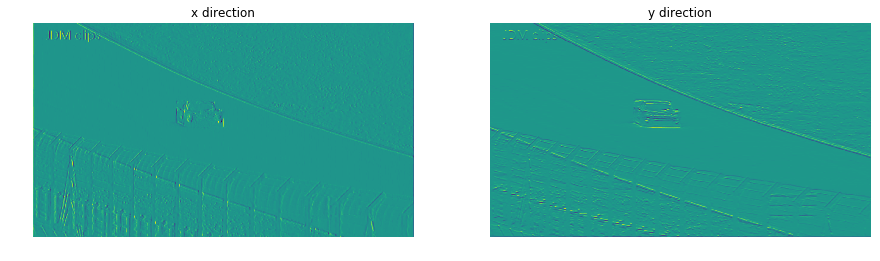

In [20]:
#EDGE DETECTION
new_im = color.rgb2gray(io.imread('images/racecar.png'))

sobelx = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])

sobely = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])

def edge_detection(image, kernel):
        
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    convoluted_image = np.zeros(image.shape)
        
    padding_x = kernel_width // 2
    padding_y = kernel_height // 2
    
    for row in range(padding_y, image_height - padding_y):
        for col in range(padding_x, image_width - padding_x):
                
            area = image[row-padding_y:row+padding_y+1, col-padding_x:col+padding_x+1]
            convoluted_image[row, col] = np.sum(area*kernel)
                
    return convoluted_image

x = edge_detection(new_im, sobelx)
y = edge_detection(new_im, sobely)

fig, axs = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0].imshow(x)
axs[0].set_title('x direction')
axs[0].axis('off')

axs[1].imshow(y)
axs[1].set_title('y direction')
axs[1].axis('off')

plt.show()
                

## Exercise 1.2 Canny Edge Detection

### Preprocessing
If you haven't yet: smooth the image with a Gaussian of your choice. Then use the Sobel operator to create the gradient magnitude and direction matrices (see slides page 23). Round the gradient directions to the 8-neighbor's directions. Display all  intermediate ***RESULT***s!


In [28]:
from scipy import signal

def gaussian_kernel(size, standard_deviation):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(size, std=standard_deviation).reshape(size, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

smoothed = conv2d(image, gaussian_kernel(size=7, standard_deviation=3))

sobel_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])
sobel_y = sobel_x.T

edges_vertical = conv2d(smoothed, sobel_x)
edges_horizontal = conv2d(smoothed, sobel_y)


G = np.sqrt(np.power(edges_vertical,2) + np.power(edges_horizontal,2))
theta = np.arctan2(edges_vertical, edges_horizontal)

# TODO: rounding to 8 neighborhood?

print(G)
print(theta)

#io.imshow(edges_vertical)
#io.imshow(edges_horizontal)

[[ 0.36787944  0.48567179  0.57375342  0.60653066  0.57375342  0.48567179
   0.36787944]
 [ 0.48567179  0.64118039  0.75746513  0.8007374   0.75746513  0.64118039
   0.48567179]
 [ 0.57375342  0.75746513  0.89483932  0.94595947  0.89483932  0.75746513
   0.57375342]
 [ 0.60653066  0.8007374   0.94595947  1.          0.94595947  0.8007374
   0.60653066]
 [ 0.57375342  0.75746513  0.89483932  0.94595947  0.89483932  0.75746513
   0.57375342]
 [ 0.48567179  0.64118039  0.75746513  0.8007374   0.75746513  0.64118039
   0.48567179]
 [ 0.36787944  0.48567179  0.57375342  0.60653066  0.57375342  0.48567179
   0.36787944]] 32.5636293869
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] 0
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]] 0
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          20.10212377 ...,   5.05632875   0.           0.        ]
 ..., 
 [  0.           0. 

### Non-Maximum Suppression
Implement the Non-Maximum Suppression step as described in the lecture. Subtract the result from the gradient magnitude image and show the ***RESULT***!

### Thresholding and Edge Tracing
Implement the edge tracing as described in the lecture and show the final result for three different threshold pairs: two low thresholds (e.g. 20 and 50), high thresholds (e.g. 80 and 120) and thresholds with large spacing (e.g. 40 and 140). (***RESULT***)
